In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import nltk
from nltk.corpus import stopwords

# File reformatting 

In [34]:
date_lst = []
seq_lst = []

with open('football', 'r', encoding='utf-8') as f:
    i = 0
    for line in f:
        #print(line)
        line = line.split('\t')
        seq_lst.append(line[0])
        date_lst.append(line[1][:-1])

In [35]:
seq_lst

['normal_query',
 'datakam',
 'yuxuda kız usagi gormek',
 'порно',
 'цефотаксим',
 'вертикальном цилиндрическом сосуде над поршнем а находится газ',
 'панель управления стиральной машины самсунг эко бабл',
 'полки авито екатеринбург',
 'зарплата санитарки в больнице боткина',
 'аптека в кубинке торговля травами',
 'wapsky ru',
 'на сумахе высыхают новые почки',
 'дизайны chimera и phantom',
 'money ships игра',
 'стол для маникюра купить',
 'рак желудка признаки',
 'электронные детские весы miniland babyscale отзывы',
 'погода в чайковском',
 'трещина ребра',
 'ryoji imaizumi',
 'праздники сегодня полный список в россии',
 'бизнес идеи',
 '24 video',
 'микрофон для магнитолы в машину',
 'батутный центр в меге',
 'какие данные называются избыточными',
 'флаги стран',
 'ютуб',
 'отзывы о инструкторах а ш старт',
 'что означает буква рядом с циырой',
 'кран с душем для мантожа на ванну',
 'как кошка зовет котят слушать',
 'видео',
 'омар хайям',
 'средство от геморроя',
 'энигма слушать о

In [36]:
date_lst

['datetime',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:32',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:33',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:34',
 '2018-06-17 09:30:35',
 '2018-06-17 09:30:35',
 '2018-06-17 09:30:35',
 '2018-06-17 09:30:35',
 '2018-06-17 09:30:35',
 '2

In [37]:
data = pd.DataFrame()
data[seq_lst[0]] = seq_lst[1:]
data[date_lst[0]] = date_lst[1:]


In [38]:
data

,normal_query,datetime
0,datakam,2018-06-17 09:30:32
1,yuxuda kız usagi gormek,2018-06-17 09:30:32
2,порно,2018-06-17 09:30:32
3,цефотаксим,2018-06-17 09:30:32
4,вертикальном цилиндрическом сосуде над поршнем...,2018-06-17 09:30:32
5,панель управления стиральной машины самсунг эк...,2018-06-17 09:30:32
6,полки авито екатеринбург,2018-06-17 09:30:32
7,зарплата санитарки в больнице боткина,2018-06-17 09:30:32
8,аптека в кубинке торговля травами,2018-06-17 09:30:32
9,wapsky ru,2018-06-17 09:30:32


In [39]:
data.to_csv('football.csv', index=False)

# Data exploring

In [2]:
data = pd.read_csv('football.csv')

In [3]:
data

,normal_query,datetime
0,datakam,2018-06-17 09:30:32
1,yuxuda kız usagi gormek,2018-06-17 09:30:32
2,порно,2018-06-17 09:30:32
3,цефотаксим,2018-06-17 09:30:32
4,вертикальном цилиндрическом сосуде над поршнем...,2018-06-17 09:30:32
5,панель управления стиральной машины самсунг эк...,2018-06-17 09:30:32
6,полки авито екатеринбург,2018-06-17 09:30:32
7,зарплата санитарки в больнице боткина,2018-06-17 09:30:32
8,аптека в кубинке торговля травами,2018-06-17 09:30:32
9,wapsky ru,2018-06-17 09:30:32


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39789519 entries, 0 to 39789518
Data columns (total 2 columns):
normal_query    object
datetime        object
dtypes: object(2)
memory usage: 607.1+ MB


In [5]:
data['datetime'] = pd.to_datetime(data['datetime'].str[:10], format='%Y-%m-%d')

In [6]:
data['datetime'].unique()

array(['2018-06-17T00:00:00.000000000', '2018-07-05T00:00:00.000000000',
       '2018-06-25T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2018-06-30T00:00:00.000000000', '2018-06-20T00:00:00.000000000',
       '2018-06-16T00:00:00.000000000', '2018-06-22T00:00:00.000000000',
       '2018-06-15T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-07-06T00:00:00.000000000', '2018-06-23T00:00:00.000000000',
       '2018-07-12T00:00:00.000000000', '2018-06-27T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-07-03T00:00:00.000000000',
       '2018-07-04T00:00:00.000000000', '2018-06-28T00:00:00.000000000',
       '2018-06-26T00:00:00.000000000', '2018-06-18T00:00:00.000000000',
       '2018-07-10T00:00:00.000000000', '2018-06-19T00:00:00.000000000',
       '2018-07-14T00:00:00.000000000', '2018-07-09T00:00:00.000000000',
       '2018-07-08T00:00:00.000000000', '2018-07-15T00:00:00.000000000',
       '2018-06-29T00:00:00.000000000', '2018-07-07

    данные с 17 июня по 13 июля
    чемпионат мира проходил с 14 июня по 15 июля

# First approach, based on basic rules

    Сейчас мы создаем некое приближение к MVP, поэтому сначала можно воспользоваться некоторыми простыми подходами.
    
    Чемпионат мира - глобальное мероприятие, куда приезжает более 1 млн туристов. Естественно, люди в первую очередь приезжают посмотреть матчи своих команд, но между матчами наверняка интересуются достопримечательностями, барами, и прочими развлечениями.
    Также, во время ЧМ изменилась трансферная инфраструктура, запустили бесплатные поезда между городами, появились специальные автобусные маршруты. В нашей стране, довольно сильно развита экосистема для поиска информации в интернете, соответственно все интересующие топики туристы искали в интернете, но скорее всего на google.com, т.к. доверия этому сервису больше. Яндексом больше пользовалась русская часть туристов. В любом случае есть часть англоязычных туристов, которые ищут на яндексе, поэтому стоит не забыть про английские ключевые слова тоже.
    
    Customer journey стандартного туриста состоит из следующих этапов: поиск жилья/транспорта, посещения матчей, посещения культурных достопримечательностей, просмотры матчей в барах, вылет домой. На основании этого, я определил некоторые смысловые группы и создал словари по каждому топику отдельно

In [22]:
#создадим словари для топиков
matches = ['расписан','чемпионат','игр','счет','счёт','чм2018', 'чм 2018'
'россия',
'португалия',
'франция',
'аргентина',
'бразилия',
'германия',
'бельгия',
'польша',
'уругвай',
'испания',
'перу',
'хорватия',
'швейцария',
'мексика',
'англия',
'колумбия',
'египет',
'иран',
'дания',
'исландия',
'коста-рика',
'швеция',
'тунис',
'сенегал',
'саудовская аравия',
'марокко',
'австралия',
'нигерия',
'сербия',
'южная корея',
'панама',
'япония']
tours = ['экскурс', 'достопримечательност', 'гид', 'достоинств','монастыр','церков','собор','музе','театр','галере','дворец','крепост'
         'кремл','красная площадь','храм','cити', 'эрмитаж', 'спас на крови','адмиралтейств','олимпийск', 'дендрари','красная поляна','смотровая']
transport = ['маршрут', 'автобус', 'поезд', 'добраться']
betting = ['ставк', 'поставит', 'коэффициент']
rent = ['аренд', 'снять', 'хостел', 'отел','booking','airbnb','циан','квартир','комнат',]

bars = ['прямая трансляция', 'показ матч', 'забронировать стол', 'бронь стола', 'футбол просмотр']

matches_lst = '|'.join(matches)
tours_lst = '|'.join(tours)
transport_lst = '|'.join(transport)
betting_lst = '|'.join(betting)
rent_lst = '|'.join(rent)
bars_lst = '|'.join(bars)



In [7]:
data = data[~data['normal_query'].isna()]

In [49]:
data['matches'] = 0
data.loc[data['normal_query'].str.contains(matches_lst), "matches"] = 1
data['tours'] = 0
data.loc[data['normal_query'].str.contains(tours_lst), "tours"] = 1
data['transport'] = 0
data.loc[data['normal_query'].str.contains(transport_lst), "transport"] = 1
data['betting'] = 0
data.loc[data['normal_query'].str.contains(betting_lst), "betting"] = 1
data['rent'] = 0
data.loc[data['normal_query'].str.contains(rent_lst), "rent"] = 1
data['bars'] = 0
data.loc[data['normal_query'].str.contains(bars_lst), "bars"] = 1

C:\Users\Den\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Den\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [8]:
data

,normal_query,datetime
0,datakam,2018-06-17
1,yuxuda kız usagi gormek,2018-06-17
2,порно,2018-06-17
3,цефотаксим,2018-06-17
4,вертикальном цилиндрическом сосуде над поршнем...,2018-06-17
5,панель управления стиральной машины самсунг эк...,2018-06-17
6,полки авито екатеринбург,2018-06-17
7,зарплата санитарки в больнице боткина,2018-06-17
8,аптека в кубинке торговля травами,2018-06-17
9,wapsky ru,2018-06-17


In [9]:
data_sampled = data.sample(n=1000000)

In [10]:
data_sampled.to_csv('data_sampled.csv',index=False)

In [51]:
data.to_csv('football2.csv', index=False)

In [88]:
data.columns

Index(['normal_query', 'datetime', 'matches', 'tours', 'transport', 'betting',
       'rent', 'bars'],
      dtype='object')

In [89]:
sum_by_group = data[['matches', 'tours', 'transport', 'betting',
       'rent', 'bars']].sum()

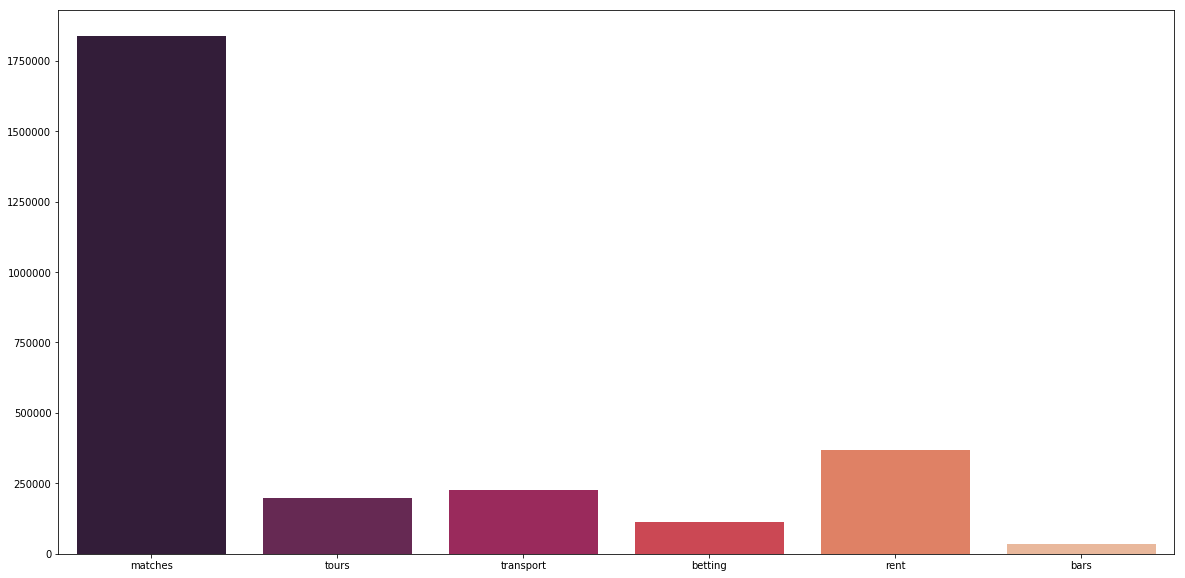

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(x=sum_by_group.index, y=sum_by_group.values, palette="rocket")

In [92]:
sum_by_date = data[['datetime','matches', 'tours', 'transport', 'betting',
       'rent', 'bars']].groupby(['datetime'], as_index=False).sum()

In [93]:
sum_by_date

,datetime,matches,tours,transport,betting,rent,bars
0,2018-06-14,67249,6890,7146,4517,11841,2335
1,2018-06-15,68172,6449,7307,3918,10778,1263
2,2018-06-16,57507,5732,6165,2910,9091,844
3,2018-06-17,53910,5958,6236,3024,9754,746
4,2018-06-18,55999,6503,7679,3921,12544,597
5,2018-06-19,78171,6494,7100,4358,12081,2917
6,2018-06-20,69321,6469,7326,4022,12269,766
7,2018-06-21,58979,6643,7391,3821,12224,562
8,2018-06-22,58143,6184,7293,3633,11570,486
9,2018-06-23,50002,5515,6149,2650,9048,618


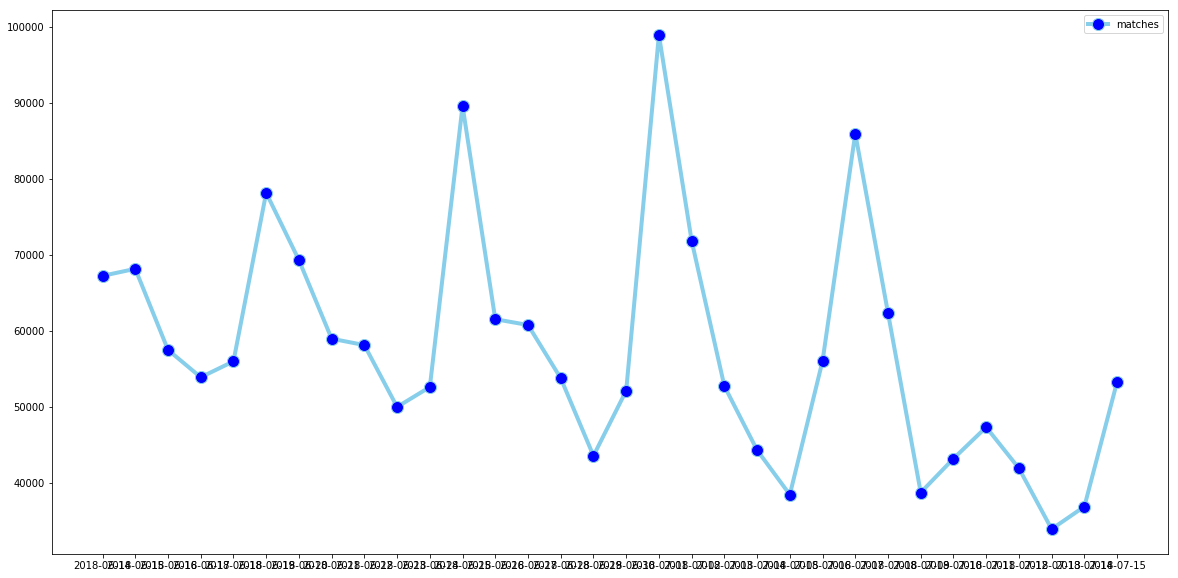

In [95]:
plt.figure(figsize=(20,10))
plt.plot( 'datetime', 'matches', data=sum_by_date, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()


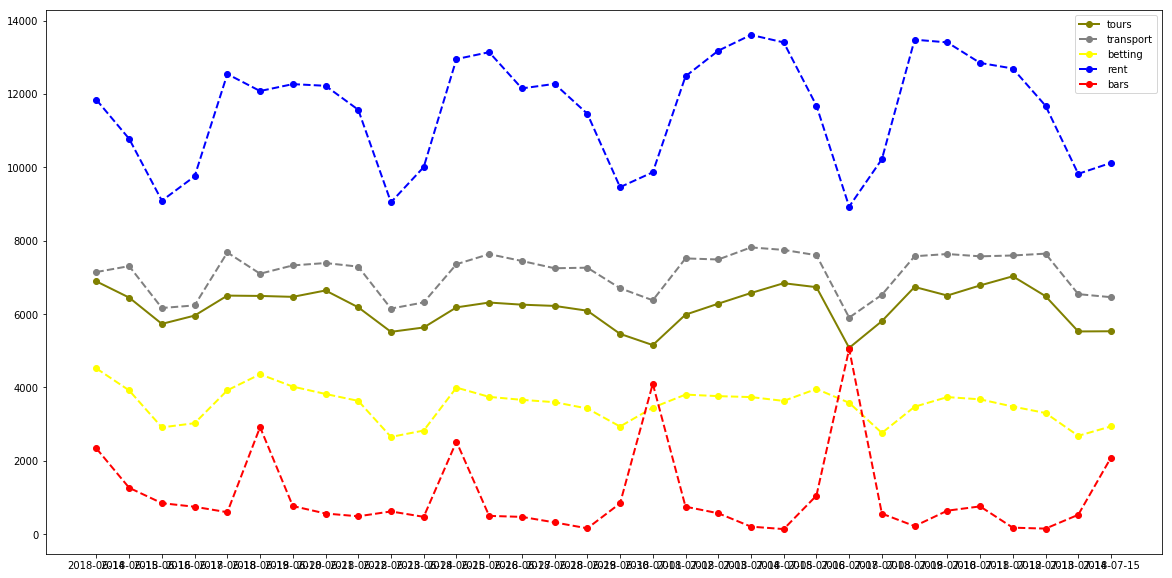

In [96]:
plt.figure(figsize=(20,10))
plt.plot( 'datetime', 'tours', data=sum_by_date, marker='o', color='olive', linewidth=2)
plt.plot( 'datetime', 'transport', data=sum_by_date, marker='o', color='grey', linewidth=2, linestyle='dashed')
plt.plot( 'datetime', 'betting', data=sum_by_date, marker='o', color='yellow', linewidth=2, linestyle='dashed')
plt.plot( 'datetime', 'rent', data=sum_by_date, marker='o', color='blue', linewidth=2, linestyle='dashed')
plt.plot( 'datetime', 'bars', data=sum_by_date, marker='o', color='red', linewidth=2, linestyle='dashed')
plt.legend()

## Result

# Approach, based on NLP 
### Tokenization
### Stop Word Removal
### Stemming
### Lemmatization 

In [3]:
data = pd.read_csv("football2.csv")

In [4]:
data

,normal_query,datetime,matches,tours,transport,betting,rent,bars
0,datakam,2018-06-17,0,0,0,0,0,0
1,yuxuda kız usagi gormek,2018-06-17,0,0,0,0,0,0
2,порно,2018-06-17,0,0,0,0,0,0
3,цефотаксим,2018-06-17,0,0,0,0,0,0
4,вертикальном цилиндрическом сосуде над поршнем...,2018-06-17,0,0,0,0,0,0
5,панель управления стиральной машины самсунг эк...,2018-06-17,0,0,0,0,0,0
6,полки авито екатеринбург,2018-06-17,0,0,0,0,0,0
7,зарплата санитарки в больнице боткина,2018-06-17,0,0,0,0,0,0
8,аптека в кубинке торговля травами,2018-06-17,0,0,0,0,0,0
9,wapsky ru,2018-06-17,0,0,0,0,0,0


In [5]:
data_s = data.sample(n=5000000)

In [6]:
data_s['query_token'] = data_s['normal_query'].apply(lambda x:  nltk.word_tokenize(x))

In [8]:
stop_words = set(stopwords.words('russian'))

In [9]:
data_s['query_filtered'] = data_s['query_token'].apply(lambda x: [w for w in x if not w in stop_words])

In [10]:
data_s

,normal_query,datetime,matches,tours,transport,betting,rent,bars,query_token,query_filtered
18646833,позилий скандер тренадцатый подвиг,2018-07-05,0,0,0,0,0,0,"[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]"
33687042,кабардинка частный сектор,2018-06-21,0,0,0,0,0,0,"[кабардинка, частный, сектор]","[кабардинка, частный, сектор]"
26458732,мультфильм 1955,2018-06-16,0,0,0,0,0,0,"[мультфильм, 1955]","[мультфильм, 1955]"
8007304,евгения баглык фейсбилдинг видео для лица все ...,2018-07-15,0,0,0,0,0,0,"[евгения, баглык, фейсбилдинг, видео, для, лиц...","[евгения, баглык, фейсбилдинг, видео, лица, се..."
22325109,ифнс ул 50 лет октября октмо,2018-06-15,0,0,0,0,0,0,"[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]"
32997770,океанариум рио,2018-06-17,0,0,0,0,0,0,"[океанариум, рио]","[океанариум, рио]"
3246531,поздравление с днем рождения бабушке от внучки...,2018-06-22,0,0,0,0,0,0,"[поздравление, с, днем, рождения, бабушке, от,...","[поздравление, днем, рождения, бабушке, внучки..."
16551372,кот взорвал интернет,2018-06-15,0,0,0,0,0,0,"[кот, взорвал, интернет]","[кот, взорвал, интернет]"
31617823,бристоль уфас,2018-07-12,0,0,0,0,0,0,"[бристоль, уфас]","[бристоль, уфас]"
3148400,поезд ласточка москва иваново расписание цена,2018-06-23,1,0,1,0,0,0,"[поезд, ласточка, москва, иваново, расписание,...","[поезд, ласточка, москва, иваново, расписание,..."


In [11]:
data_s.to_csv('data_s.csv',index=False)

In [19]:
data_s

,normal_query,datetime,matches,tours,transport,betting,rent,bars,query_token,query_filtered
18646833,позилий скандер тренадцатый подвиг,2018-07-05,0,0,0,0,0,0,"[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]"
33687042,кабардинка частный сектор,2018-06-21,0,0,0,0,0,0,"[кабардинка, частный, сектор]","[кабардинка, частный, сектор]"
26458732,мультфильм 1955,2018-06-16,0,0,0,0,0,0,"[мультфильм, 1955]","[мультфильм, 1955]"
8007304,евгения баглык фейсбилдинг видео для лица все ...,2018-07-15,0,0,0,0,0,0,"[евгения, баглык, фейсбилдинг, видео, для, лиц...","[евгения, баглык, фейсбилдинг, видео, лица, се..."
22325109,ифнс ул 50 лет октября октмо,2018-06-15,0,0,0,0,0,0,"[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]"
32997770,океанариум рио,2018-06-17,0,0,0,0,0,0,"[океанариум, рио]","[океанариум, рио]"
3246531,поздравление с днем рождения бабушке от внучки...,2018-06-22,0,0,0,0,0,0,"[поздравление, с, днем, рождения, бабушке, от,...","[поздравление, днем, рождения, бабушке, внучки..."
16551372,кот взорвал интернет,2018-06-15,0,0,0,0,0,0,"[кот, взорвал, интернет]","[кот, взорвал, интернет]"
31617823,бристоль уфас,2018-07-12,0,0,0,0,0,0,"[бристоль, уфас]","[бристоль, уфас]"
3148400,поезд ласточка москва иваново расписание цена,2018-06-23,1,0,1,0,0,0,"[поезд, ласточка, москва, иваново, расписание,...","[поезд, ласточка, москва, иваново, расписание,..."


In [24]:
data_s['query_filtered_no_target'] = data_s['query_token'].apply(lambda x: [w for w in x if not w in matches+tours+transport+betting+rent+bars])

In [25]:
data_s

,normal_query,datetime,matches,tours,transport,betting,rent,bars,query_token,query_filtered,query_filtered_no_target
18646833,позилий скандер тренадцатый подвиг,2018-07-05,0,0,0,0,0,0,"[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]"
33687042,кабардинка частный сектор,2018-06-21,0,0,0,0,0,0,"[кабардинка, частный, сектор]","[кабардинка, частный, сектор]","[кабардинка, частный, сектор]"
26458732,мультфильм 1955,2018-06-16,0,0,0,0,0,0,"[мультфильм, 1955]","[мультфильм, 1955]","[мультфильм, 1955]"
8007304,евгения баглык фейсбилдинг видео для лица все ...,2018-07-15,0,0,0,0,0,0,"[евгения, баглык, фейсбилдинг, видео, для, лиц...","[евгения, баглык, фейсбилдинг, видео, лица, се...","[евгения, баглык, фейсбилдинг, видео, для, лиц..."
22325109,ифнс ул 50 лет октября октмо,2018-06-15,0,0,0,0,0,0,"[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]"
32997770,океанариум рио,2018-06-17,0,0,0,0,0,0,"[океанариум, рио]","[океанариум, рио]","[океанариум, рио]"
3246531,поздравление с днем рождения бабушке от внучки...,2018-06-22,0,0,0,0,0,0,"[поздравление, с, днем, рождения, бабушке, от,...","[поздравление, днем, рождения, бабушке, внучки...","[поздравление, с, днем, рождения, бабушке, от,..."
16551372,кот взорвал интернет,2018-06-15,0,0,0,0,0,0,"[кот, взорвал, интернет]","[кот, взорвал, интернет]","[кот, взорвал, интернет]"
31617823,бристоль уфас,2018-07-12,0,0,0,0,0,0,"[бристоль, уфас]","[бристоль, уфас]","[бристоль, уфас]"
3148400,поезд ласточка москва иваново расписание цена,2018-06-23,1,0,1,0,0,0,"[поезд, ласточка, москва, иваново, расписание,...","[поезд, ласточка, москва, иваново, расписание,...","[ласточка, москва, иваново, расписание, цена]"


# TF-IDF, KMeans and SVD

In [68]:
data_s

,normal_query,datetime,matches,tours,transport,betting,rent,bars,query_token,query_filtered,query_filtered_no_target
18646833,позилий скандер тренадцатый подвиг,2018-07-05,0,0,0,0,0,0,"[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]"
33687042,кабардинка частный сектор,2018-06-21,0,0,0,0,0,0,"[кабардинка, частный, сектор]","[кабардинка, частный, сектор]","[кабардинка, частный, сектор]"
26458732,мультфильм 1955,2018-06-16,0,0,0,0,0,0,"[мультфильм, 1955]","[мультфильм, 1955]","[мультфильм, 1955]"
8007304,евгения баглык фейсбилдинг видео для лица все ...,2018-07-15,0,0,0,0,0,0,"[евгения, баглык, фейсбилдинг, видео, для, лиц...","[евгения, баглык, фейсбилдинг, видео, лица, се...","[евгения, баглык, фейсбилдинг, видео, для, лиц..."
22325109,ифнс ул 50 лет октября октмо,2018-06-15,0,0,0,0,0,0,"[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]"
32997770,океанариум рио,2018-06-17,0,0,0,0,0,0,"[океанариум, рио]","[океанариум, рио]","[океанариум, рио]"
3246531,поздравление с днем рождения бабушке от внучки...,2018-06-22,0,0,0,0,0,0,"[поздравление, с, днем, рождения, бабушке, от,...","[поздравление, днем, рождения, бабушке, внучки...","[поздравление, с, днем, рождения, бабушке, от,..."
16551372,кот взорвал интернет,2018-06-15,0,0,0,0,0,0,"[кот, взорвал, интернет]","[кот, взорвал, интернет]","[кот, взорвал, интернет]"
31617823,бристоль уфас,2018-07-12,0,0,0,0,0,0,"[бристоль, уфас]","[бристоль, уфас]","[бристоль, уфас]"
3148400,поезд ласточка москва иваново расписание цена,2018-06-23,1,0,1,0,0,0,"[поезд, ласточка, москва, иваново, расписание,...","[поезд, ласточка, москва, иваново, расписание,...","[ласточка, москва, иваново, расписание, цена]"


In [69]:
data_s['target'] = 'other'
data_s.loc[data_s['matches'] > 0, 'target'] = 'matches'
data_s.loc[data_s['tours'] > 0, 'target'] = 'tours'
data_s.loc[data_s['transport'] > 0, 'target'] = 'transport'
data_s.loc[data_s['betting'] > 0, 'target'] = 'betting'
data_s.loc[data_s['rent'] > 0, 'target'] = 'rent'
data_s.loc[data_s['bars'] > 0, 'target'] = 'bars'

In [67]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

In [27]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [52]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.65, min_df=1,
                                   max_features=200)

In [53]:
tfidf = tfidf_vectorizer.fit_transform(data_s['normal_query'])

In [50]:
tfidf_vectorizer.build_analyzer()

<function sklearn.feature_extraction.text.VectorizerMixin.build_analyzer.<locals>.<lambda>>

In [57]:
from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np



In [62]:
svd = TruncatedSVD(30)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

tfidf = lsa.fit_transform(tfidf)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

print()

Explained variance of the SVD step: 48%



In [70]:
km = KMeans(n_clusters=7, init='k-means++', max_iter=100, n_init=1, 
                verbose=False)

In [71]:
km.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=7, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)

In [73]:
km.labels_.shape

(5000000,)

In [74]:
data_s['labels_'] = km.labels_
data_s

,normal_query,datetime,matches,tours,transport,betting,rent,bars,query_token,query_filtered,query_filtered_no_target,target,labels_
18646833,позилий скандер тренадцатый подвиг,2018-07-05,0,0,0,0,0,0,"[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]","[позилий, скандер, тренадцатый, подвиг]",other,4
33687042,кабардинка частный сектор,2018-06-21,0,0,0,0,0,0,"[кабардинка, частный, сектор]","[кабардинка, частный, сектор]","[кабардинка, частный, сектор]",other,1
26458732,мультфильм 1955,2018-06-16,0,0,0,0,0,0,"[мультфильм, 1955]","[мультфильм, 1955]","[мультфильм, 1955]",other,0
8007304,евгения баглык фейсбилдинг видео для лица все ...,2018-07-15,0,0,0,0,0,0,"[евгения, баглык, фейсбилдинг, видео, для, лиц...","[евгения, баглык, фейсбилдинг, видео, лица, се...","[евгения, баглык, фейсбилдинг, видео, для, лиц...",other,1
22325109,ифнс ул 50 лет октября октмо,2018-06-15,0,0,0,0,0,0,"[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]","[ифнс, ул, 50, лет, октября, октмо]",other,0
32997770,океанариум рио,2018-06-17,0,0,0,0,0,0,"[океанариум, рио]","[океанариум, рио]","[океанариум, рио]",other,0
3246531,поздравление с днем рождения бабушке от внучки...,2018-06-22,0,0,0,0,0,0,"[поздравление, с, днем, рождения, бабушке, от,...","[поздравление, днем, рождения, бабушке, внучки...","[поздравление, с, днем, рождения, бабушке, от,...",other,1
16551372,кот взорвал интернет,2018-06-15,0,0,0,0,0,0,"[кот, взорвал, интернет]","[кот, взорвал, интернет]","[кот, взорвал, интернет]",other,1
31617823,бристоль уфас,2018-07-12,0,0,0,0,0,0,"[бристоль, уфас]","[бристоль, уфас]","[бристоль, уфас]",other,1
3148400,поезд ласточка москва иваново расписание цена,2018-06-23,1,0,1,0,0,0,"[поезд, ласточка, москва, иваново, расписание,...","[поезд, ласточка, москва, иваново, расписание,...","[ласточка, москва, иваново, расписание, цена]",transport,0


In [80]:
table = pd.pivot_table(data_s,values='normal_query', index='target', columns='labels_', aggfunc='count' )

In [81]:
table

labels_,0,1,2,3,4,5,6
target,,,,,,,
bars,2422,60,1675,34,1,1,2
betting,1853,8124,191,3751,4,40,26
matches,121641,67107,8821,15319,995,1647,261
other,531929,3386126,157257,297441,115227,96566,81877
rent,5009,34751,285,5871,110,223,342
tours,3675,17165,259,2229,49,173,829
transport,10816,11947,519,5039,96,161,54


In [84]:
data_s.to_csv('data_s2.csv', index=False)

In [8]:
data_sample = data.sample(n=100000)

In [14]:
data_sample['query_token'] = data_sample['normal_query'].apply(lambda x:  nltk.word_tokenize(x))
data_sample

,normal_query,datetime,matches,query_token
2467541,что дадут в аватарии на день рождения двух 2018,2018-06-15,0,"[что, дадут, в, аватарии, на, день, рождения, ..."
13606000,reserved,2018-06-24,0,[reserved]
35732467,прибор для проверки сливочного масла продам,2018-06-28,0,"[прибор, для, проверки, сливочного, масла, про..."
13886074,погода коста брава,2018-06-17,0,"[погода, коста, брава]"
36550010,пансионат холодная речка абхазия официальный сайт,2018-06-14,0,"[пансионат, холодная, речка, абхазия, официаль..."
18615059,одноклассники,2018-07-12,0,[одноклассники]
8199260,в поисках божественного рецепта манга,2018-07-07,0,"[в, поисках, божественного, рецепта, манга]"
18645661,гост 2591 2006 15 15,2018-07-12,0,"[гост, 2591, 2006, 15, 15]"
23713077,броколи,2018-07-02,0,[броколи]
34257829,греф герман,2018-06-30,0,"[греф, герман]"


In [15]:
data_sample['query_pos_tag'] = data_sample['query_token'].apply(lambda x:  nltk.pos_tag(x))
data_sample

,normal_query,datetime,matches,query_token,query_pos_tag
2467541,что дадут в аватарии на день рождения двух 2018,2018-06-15,0,"[что, дадут, в, аватарии, на, день, рождения, ...","[(что, JJ), (дадут, NNP), (в, NNP), (аватарии,..."
13606000,reserved,2018-06-24,0,[reserved],"[(reserved, VBN)]"
35732467,прибор для проверки сливочного масла продам,2018-06-28,0,"[прибор, для, проверки, сливочного, масла, про...","[(прибор, JJ), (для, NNP), (проверки, NNP), (с..."
13886074,погода коста брава,2018-06-17,0,"[погода, коста, брава]","[(погода, JJ), (коста, NNP), (брава, NN)]"
36550010,пансионат холодная речка абхазия официальный сайт,2018-06-14,0,"[пансионат, холодная, речка, абхазия, официаль...","[(пансионат, JJ), (холодная, NNP), (речка, NNP..."
18615059,одноклассники,2018-07-12,0,[одноклассники],"[(одноклассники, NN)]"
8199260,в поисках божественного рецепта манга,2018-07-07,0,"[в, поисках, божественного, рецепта, манга]","[(в, JJ), (поисках, NNP), (божественного, NNP)..."
18645661,гост 2591 2006 15 15,2018-07-12,0,"[гост, 2591, 2006, 15, 15]","[(гост, NN), (2591, CD), (2006, CD), (15, CD),..."
23713077,броколи,2018-07-02,0,[броколи],"[(броколи, NN)]"
34257829,греф герман,2018-06-30,0,"[греф, герман]","[(греф, NN), (герман, NN)]"


In [20]:
stop_words

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [32]:
matches_lst

'расписан|чемпионат|игр'

In [ ]:
data_sample.loc[data_sample['normal_query'].str.contains(matches_lst), "matches"] = 1

In [34]:
data_sample[data_sample['normal_query'].str.contains('футбол')]


,normal_query,datetime,matches,query_token,query_pos_tag,query_filtered
10900077,счет футбола сегодня,2018-06-25,0,"[счет, футбола, сегодня]","[(счет, JJ), (футбола, NNP), (сегодня, NN)]","[счет, футбола, сегодня]"
18840353,футбол турнирная таблица 2018,2018-07-04,0,"[футбол, турнирная, таблица, 2018]","[(футбол, JJ), (турнирная, NNP), (таблица, NN)...","[футбол, турнирная, таблица, 2018]"
22661669,футбол чемпионат мира 2018 турнирная таблица р...,2018-07-07,1,"[футбол, чемпионат, мира, 2018, турнирная, таб...","[(футбол, JJ), (чемпионат, NNP), (мира, NN), (...","[футбол, чемпионат, мира, 2018, турнирная, таб..."
35726774,бензема футболист,2018-06-28,0,"[бензема, футболист]","[(бензема, NN), (футболист, NN)]","[бензема, футболист]"
10746741,новая сторублевая купюра к чемпионату мира по ...,2018-06-14,1,"[новая, сторублевая, купюра, к, чемпионату, ми...","[(новая, JJ), (сторублевая, NNP), (купюра, NNP...","[новая, сторублевая, купюра, чемпионату, мира,..."
7951410,тренер германии по футболу,2018-06-28,0,"[тренер, германии, по, футболу]","[(тренер, JJ), (германии, NNP), (по, NNP), (фу...","[тренер, германии, футболу]"
32765687,результаты матчей чм по футболу 2018,2018-07-02,0,"[результаты, матчей, чм, по, футболу, 2018]","[(результаты, JJ), (матчей, NNP), (чм, NNP), (...","[результаты, матчей, чм, футболу, 2018]"
35703307,рейтинг команд на чемпионате мира по футболу 2018,2018-06-18,1,"[рейтинг, команд, на, чемпионате, мира, по, фу...","[(рейтинг, JJ), (команд, NNP), (на, NNP), (чем...","[рейтинг, команд, чемпионате, мира, футболу, 2..."
26661358,чм по футболу,2018-07-01,0,"[чм, по, футболу]","[(чм, JJ), (по, NNP), (футболу, NN)]","[чм, футболу]"
32994044,когда начинается чемпионат мира по футболу 201...,2018-06-17,1,"[когда, начинается, чемпионат, мира, по, футбо...","[(когда, JJ), (начинается, NNP), (чемпионат, N...","[начинается, чемпионат, мира, футболу, 2018, к..."


In [43]:
data_sample['query_filtered'][2467541][0]

'дадут'